<a href="https://colab.research.google.com/github/JraHike76/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Jay_Adamo_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
#mean

3505 + 2400 + 3027 + 2798 + 3700 + 3250 + 2689/7

19064.14285714286

In [0]:
# variance

((3505 + 2400 + 3027 + 2798 + 3700 + 3250 + 2689) - 19064.14285714286)**2/6

885394.408163264

In [0]:
#standard deviation

(((3505 + 2400 + 3027 + 2798 + 3700 + 3250 + 2689) - 19064.14285714286)**2/7)**-0.5

0.0011479025150274047

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import pandas as pd
import numpy as np
import scipy

In [0]:
# Setting up arrays for sales and customers to create a df
sales = [3505,2400,3027,2798,3700,3250,2689]
customers = [127, 80, 105, 92, 120, 115, 93]

df = pd.DataFrame({'customers': customers, 'sales': sales})

df.head(7)

,customers,sales
0,127,3505
1,80,2400
2,105,3027
3,92,2798
4,120,3700
5,115,3250
6,93,2689


In [0]:
df.cov()

,customers,sales
customers,290.952381,7604.357143
sales,7604.357143,214387.904762


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# Using python functions to find standard deviation, covariance and correlation 
# coefficient for sales and customers

df['customers'].std()

17.057326313123664

In [0]:
df['sales'].std()

463.0204150595357

In [0]:
df['customers'].var()

290.95238095238096

In [0]:
df['sales'].var()

214387.90476190473

In [0]:
# checking work with numpy
# defining mean

def mean(data, ddof=0):
  data = np.array(data)
  return sum(data)/(len(data)-ddof)

In [0]:
# Defining variance

def variance(data):
  data = np.array(data)
  variance = mean((data - mean(data))**2, ddof=1)
  return variance

# checking variance of sales and customers
print(variance(df['sales']))
print(variance(df['customers']))

214387.90476190473
290.95238095238096


In [0]:
# defining standard deviation

def std_dev(data):
  data = np.array(data)
  std = np.sqrt(variance(data))
  return std
  
# checking standard deviation of sales and customers
print(std_dev(df['sales']))
print(std_dev(df['customers']))

463.0204150595357
17.057326313123664


In [0]:
df.cov()

,customers,sales
customers,290.952381,7604.357143
sales,7604.357143,214387.904762


In [0]:
df.cov()['sales']['customers']

7604.357142857142

In [0]:
df.corr()['sales']['customers']

0.9628339778148908

In [0]:
def correlation(covariance, var1, var2):
  var1 = np.array(var1)
  var2 = np.array(var2)
  std1 = std_dev(var1)
  std2 = std_dev(var2)
  r = covariance / (std1*std2)
  return r

correlation(covariance, df['sales'], df['customers'])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

df

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1306,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,1307,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,1308,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1308,1309,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0


In [0]:
# checking what columns are most interesting to work with

df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
df['survived'].head(7)

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
5    1.0
6    1.0
Name: survived, dtype: float64

In [0]:
df['age'].head(7)

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
Name: age, dtype: float64

In [0]:
# variance of survived and age

print(df['survived'].var())
print(df['age'].var())

0.23624962912604308
165.85002094093528


In [0]:
# covariance of survived and age

df.cov()['survived']['age']

-0.3143433003110746

In [0]:
# standard deviation of survived and age

print(df['survived'].std())
print(df['age'].std())

0.48605517086648004
12.878277095207078


In [0]:
# correlation of survived and age

df.corr()['survived']['age']

-0.050198983636982906

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

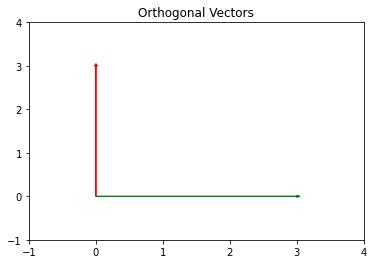

In [0]:
import matplotlib.pyplot as plt
# setting up 2 orthogonal vectors to plot
vector_1 = [0, 3]
vector_2 = [3, 0]

plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,4)          
plt.ylim(-1,4)
plt.title("Orthogonal Vectors")
plt.show()

In [0]:
# The synonym for Orthogonal is perpindicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# No because these vectors values will not allow for a zero dot product nor a visual of a perpindicular

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
import numpy as np
c= np.array([2,-15,6,20])
# ||c||**2


(np.linalg.norm(c))**2

665.0

In [0]:
# c(dot)c

(np.dot(c,c))

665

In [0]:
# c(T)c

c.T*c

array([  4, 225,  36, 400])

In [0]:
# The square of the norm of c is equal to the dot product of c

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [0]:
# using Latex below I was able to create a visual for a linear combination
# d is equal to parts of its vector multiplied by i hat and j hat
# e is equal to parts of its vector multiplied by i hat and j hat and k hat

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix}12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix}11\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix}-8\begin{bmatrix} 0 \\0 \\ 1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [88]:
# create numpy array
f= np.array([4,12,11,9,2])

# divide f by norm of f to get the unit vector
vect_f = f / np.linalg.norm(f)

vect_f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

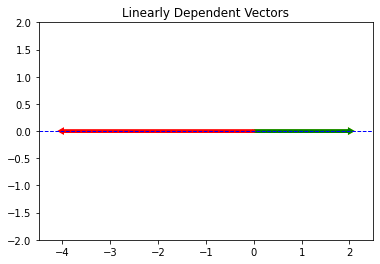

In [97]:
# Plot Linearly Dependent Vectors

# Axis
plt.xlim(-4.5,2.5)          
plt.ylim(-2,2)

# Vectors
v= [2,0]
v1 = np.multiply(1, v)
v2 = np.multiply(-2,v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v1[0], v1[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# Span is the sets of all possible vectors that can be created with linear combination

# span of g is 2
# span of h is 2

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# span of g is 3
# span of h is 3
# span of h is 3
# span of {l,m,n} is 9

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



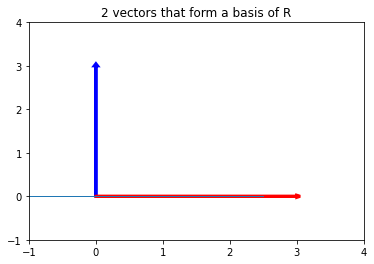

In [105]:
# 2 vectors that form a basis of R

# Axis
plt.xlim(-1,4)          
plt.ylim(-1,4)

# Vectors
rv1 = (0, 3)
rv2 = (3,0)

# Plot Vectors
plt.plot(x_vals, y_vals,linewidth=1)
plt.arrow(0,0, rv1[0], rv1[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, rv2[0], rv2[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("2 vectors that form a basis of R")
plt.show()


## 6.2 What does it mean to form a basis?

The basis of a vector space (V) is a set of vectors that are linearly independent and that span V. You can form a basis for any V as long as they are linearly independent and span that space.

We can describe any vector in any dimensionality this way provided we use all of the unit vectors for that space and scale them all appropriately.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}



```
The rank of P is 3 because the rows and columns are unique and independent of each other
```



## 7.2 What does the rank of a matrix tell us?

The rank of a matrix gives us information about the matrix such as the maximum number of independent columns or rows

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = np.array([1,3])
w = np.array([-1,2])

numerator = np.vdot(w,v)
denominator = np.vdot(v,v)
fraction = numerator / denominator

new_position = fraction*v

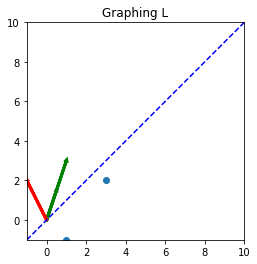

In [108]:

plt.xlim(-1,10)          
plt.ylim(-1,10)
axes = plt.gca()
axes.set_aspect('equal')
x_vals = np.array(axes.get_xlim())
y_vals = x_vals
plt.plot(x_vals, y_vals, '--', color='b')
plt.scatter(v, w)
plt.arrow(0, 0, new_position[0], new_position[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Graphing L")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()